## 감성분석 - 영화리뷰 분석
---
- IMDB 데이터 활용

In [ ]:
from tensorflow.keras.datasets.imdb import load_data
import numpy as np

## [1] 데이터 준비

In [ ]:
# 단어사전(voca)에서 빈도가 높은 500개까지만 사용하도록 설정
(X_train, y_train), (X_test, y_test)=load_data(num_words=500)

In [ ]:
print(f'imDB 정보 \nX_train : {X_train.shape}   y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}    y_test : {y_test.shape}')

imDB 정보 
X_train : (25000,)   y_train : (25000,)
X_test : (25000,)    y_test : (25000,)


In [ ]:
for idx  in range(3):
    print(f'[{idx} - {y_train[idx]} : {len(X_train[idx])}]\n{X_train[idx]}')
    print('----------------------------------------------')

[0 - 1 : 218]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
----------------------------------------------
[1 - 0 : 189]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 39

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)

### [2-1] 리뷰 데이터 길이 지정

In [ ]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([ len(x) for x in X_train])

print(f'all_lengh : {np.mean(all_length)}, {np.median(all_length)}')

all_lengh : 238.71364, 178.0


In [ ]:
import pandas as pd

uniqueDF=pd.DataFrame(np.unique(all_length, return_counts=True))
uniqueDF=uniqueDF.T

In [ ]:
uniqueDF.sort_values(by=1, ascending=False)

,0,1
118,132,196
111,125,194
116,130,191
108,122,181
110,124,180
...,...,...
921,974,1
743,761,1
919,972,1
744,762,1


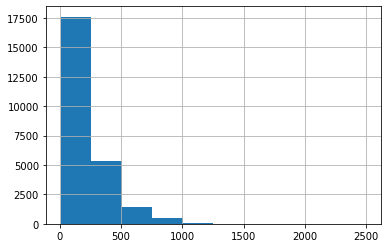

In [ ]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

In [ ]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100)
train_seq.shape, train_seq[2], train_seq[2].shape, train_seq[2].size

((25000, 100),
 array([  2,   4,   2,  33,  89,  78,  12,  66,  16,   4, 360,   7,   4,
         58, 316, 334,  11,   4,   2,  43,   2,   2,   8, 257,  85,   2,
         42,   2,   2,  83,  68,   2,  15,  36, 165,   2, 278,  36,  69,
          2,   2,   8, 106,  14,   2,   2,  18,   6,  22,  12, 215,  28,
          2,  40,   6,  87, 326,  23,   2,  21,  23,  22,  12, 272,  40,
         57,  31,  11,   4,  22,  47,   6,   2,  51,   9, 170,  23,   2,
        116,   2,   2,  13, 191,  79,   2,  89,   2,  14,   9,   8, 106,
          2,   2,  35,   2,   6, 227,   7, 129, 113], dtype=int32),
 (100,),
 100)

In [ ]:
test_seq = pad_sequences(X_test, maxlen=100)
test_seq.shape

(25000, 100)

In [ ]:
## 패딩 확인
print(f'X_train[0]   : {len(X_train[2])}길이 {X_train[2][:10]}')
print(f'train_seq[0] : {len(train_seq[2])}길이 {train_seq[2][:10]}')

X_train[0]   : 141길이 [1, 14, 47, 8, 30, 31, 7, 4, 249, 108]
train_seq[0] : 100길이 [ 2  4  2 33 89 78 12 66 16  4]


### [2-2] 타겟 데이터 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_oh =to_categorical(train_seq)
test_oh=to_categorical(test_seq)

In [ ]:
train_oh.shape, train_oh[0], test_oh.shape, test_oh[0], y_train.shape

### [2-3] 훈련/테스트 데이터 준비

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_oh, 
                                                  y_train, test_size=0.2, random_state=42)

In [ ]:
print(f'X_train : {X_train.shape}\ntest_seq : {test_seq.shape}\nX_val : {X_val.shape}')
print(f'y_train : {y_train.shape}\ny_test   : {y_test.shape}\ny_val : {y_val.shape}')

## [3] 모델
---
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습 : RNN 순환신경망
- 입력 : 500
- 출력 : 1 => 분류 => 2진분류

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### [3-1] 모델 구성
---
- 입력층 : 노드 n개   타임스템수,피쳐수   => SimpleRNN
- 출력층 : 노드 1개   sigmoid             => Dense

In [ ]:
model=Sequential()
# input_shape=(타임스템프크기, 토큰크기)
model.add(SimpleRNN(9, input_shape=(100, 500), return_sequences=True))   # 1개 노드 = w500+b+hw9  * 9 전체 노드수 
model.add(SimpleRNN(9))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### [3-2] 모델 생성
---
- 손실함수, 최적화방법, 평가함목 => compile()

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

## [4] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validataion_split
- 학습 중 이벤트 처리 => callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절  => epochs
- 배치사이즈 조절 => batch_size (기:32)

In [ ]:
history=model.fit(X_train, y_train, epochs=10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

## Embedding RNN Model
---
- One-Hot-Encoding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집형태의 벡터로 변경 ==> Word Embedding
- Embedding Layer 적용
    * 입력 차원 - 토큰의 크기 즉 단어사전의 크기
    * 출력 차원 - 줄여서 생성하는 벡터 크기
    * 입력 층일경우 -> input_dim = 타임스템프 즉 하나의 문장을 구성하는 토큰 수

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
model2=Sequential()
# One-Hot-Encoding 500의 거대한 데이터 => 밀집형태 20크기 벡터로 변환
model2.add(Embedding(500, 20, input_length=100))
model2.add(SimpleRNN(10))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

In [ ]:
history=model.fit(X_train, y_train, epochs=10)

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()